### import packages, functions
#### set up some things for the notebook

In [1]:
from behavior_analysis import *

UV='#4B0082'
Green='#6B8E23'
Blue = '#0033cc'

%matplotlib inline
%load_ext autoreload
%autoreload 2 
sns.set_style("white")
import warnings
warnings.filterwarnings('ignore')

#sns.set_palette(['#4d0000','#cc0000','#ff6666','#ffb3b3'])
sns.set_palette(['#d9d9d9','#a6a6a6','#666666','#000000']) # gray scale
sns.set_palette(["#11a421",
"#00b9d6",
"#027cfc",
"#e158d8",
"#e891ac"])# from http://tools.medialab.sciences-po.fr/iwanthue/; HCL; H [109 - 360]; hard

/Users/administrator/anaconda/lib/python2.7/site-packages/imaging_behavior/core/tifffile.py:2170: UserWarning: failed to import _tifffile.decodepackbits
  warnings.warn("failed to import %s" % module_function)
/Users/administrator/anaconda/lib/python2.7/site-packages/imaging_behavior/core/tifffile.py:2170: UserWarning: failed to import _tifffile.decodelzw
  warnings.warn("failed to import %s" % module_function)
/Users/administrator/anaconda/lib/python2.7/site-packages/imaging_behavior/core/tifffile.py:2170: UserWarning: failed to import _tifffile.unpackints
  warnings.warn("failed to import %s" % module_function)


In [2]:
def fit_contrast(data_x,data,bounds=False):
    contrasts = data_x
    a = data
    fit = fit_hyperbolicratio(contrasts[16:],a[16:],
                                 np.min(a[16:]),
                                 np.max(a[16:])-np.min(a[16:]),
                                 contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])))[0][0]],
                                 3,
                                 bounds=bounds)

    return fit

In [3]:
def fit_contrast_(data_x,data,bounds=False):
    contrasts = data_x
    a = data
    fit_ON = fit_hyperbolicratio(contrasts[16:],a[16:],
                                 np.min(a[16:]),
                                 np.max(a[16:])-np.min(a[16:]),
                                 contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])))[0][0]],
                                 3,
                                 bounds=bounds)
    x=contrasts[:17][::-1]*-1
    fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],
                                  np.min(a[:17][::-1]),
                                  np.max(a[-1]),
                                  x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])))[0][0]],
                                  3,
                                  bounds=bounds)
#     x=contrasts[:18][::-1]*-1
#     fit_OFF = fit_hyperbolicratio(x,a[:18][::-1],np.min(a[:18][::-1]),np.max(a[:18][::-1])-np.min(a[:18][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])))[0][0]],3,
#                                   bounds=False)
    return fit_ON, fit_OFF

In [4]:
coords = [[15,-10],[15,10],[15,30],[15,50]]

### load data; dates used to define epochs are from the experimental notes.

In [5]:
load_from_pickles = False
load_from_dataframes = True

In [6]:
if load_from_pickles:
    df1 = pd.read_pickle('/Volumes/DATA2/behavior/cohort1/df_color2.pkl')
    df_color2 = df1
    df_color_pos2 = df_color2[df_color2.date < 7.613]# before july 19, 10º
    df_color_pos_t = df_color2[df_color2.date > 7.613]# after july 19, 30º or -10º
    df_color_pos1_c1 = df_color_pos_t[df_color_pos_t.date < 8.32]# before august 19, 30º
    df_color_pos3_c1 = df_color_pos_t[df_color_pos_t.date > 8.32];
    df_color_pos3_c1 = df_color_pos3_c1[df_color_pos3_c1.date < 9.62]# after august 19, -10º
    df_color_pos1_corrected_c1 = df_color_pos_t[df_color_pos_t.date > 10.0];
    df_color_corrected_p30_c1 = df_color_pos1_corrected_c1[df_color_pos_t.date < 10.3]# after september 20, 30º | after 10/1 for hue axis only  
    df_color_pos2_corrected_c1 = df_color_pos_t[df_color_pos_t.date > 10.3];
    df_color_corrected_p10_c1 = df_color_pos2_corrected_c1[df_color_pos_t.date < 10.54]# after october 10, 10º
    df_color_corrected_n10_c1 = df_color_pos_t[df_color_pos_t.date > 10.54]# after october 17, -10º

    df2 = pd.read_pickle('/Volumes/DATA2/behavior/cohort2/df_color2.pkl')
    df_color2 = df2
    df_color_p10_c2 = df_color2[df_color2.date > 2.42][df_color2.date < 2.75]
    df_color_p30_c2 = df_color2[df_color2.date > 2.75][df_color2.date < 3.26]
    df_color_n10_c2 = df_color2[df_color2.date > 3.26][df_color2.date < 3.4]
    df_color_corrected_n10_c2 = df_color2[df_color2.date > 3.4][(df_color2.date < 3.64) | (df_color2.date > 4.09 )][df_color2.date < 4.2]
    df_color_corrected_p10_c2 = df_color2[df_color2.date > 3.64][(df_color2.date < 3.87) | (df_color2.date > 4.2)][df_color2.date < 4.35]
    df_color_corrected_p30_c2 = df_color2[df_color2.date > 3.87][df_color2.date < 4.2]
    df_color_corrected_p50_c2 = df_color2[df_color2.date > 4.35]

    df_n10_uncorrected = pd.concat((df_color_pos3_c1,df_color_n10_c2),ignore_index=True)
    df_p10_uncorrected = pd.concat((df_color_pos2,df_color_p10_c2),ignore_index=True)
    df_p30_uncorrected = pd.concat((df_color_pos1_c1,df_color_p30_c2),ignore_index=True)

    df_n10_corrected = pd.concat((df_color_corrected_n10_c1,df_color_corrected_n10_c2),ignore_index=True)
    df_p10_corrected = pd.concat((df_color_corrected_p10_c1,df_color_corrected_p10_c2),ignore_index=True)
    df_p30_corrected = pd.concat((df_color_corrected_p30_c1,df_color_corrected_p30_c2),ignore_index=True)
    df_p50_corrected = df_color_corrected_p50_c2

In [8]:
if load_from_dataframes:
    df_n10_uncorrected = pd.read_json('df_n10_uncorrected.json')
    df_p10_uncorrected = pd.read_json('df_p10_uncorrected.json')
    df_p30_uncorrected = pd.read_json('df_p30_uncorrected.json')
    df_n10_corrected = pd.read_json('df_n10_corrected.json')
    df_p10_corrected = pd.read_json('df_p10_corrected.json')
    df_p30_corrected = pd.read_json('df_p30_corrected.json')
    df_p50_corrected = pd.read_json('df_p50_corrected.json')

In [9]:
if os.path.isfile('performace_matrices.pkl'):
    performance = pkl.load(open('performace_matrices.pkl'))
else:
    performance = {}
    performance['p30_uncorrected']=[calculate_color_performance(df_p30_uncorrected)]
    performance['p10_uncorrected']=[calculate_color_performance(df_p10_uncorrected)]
    performance['n10_uncorrected']=[calculate_color_performance(df_n10_uncorrected)]
    performance['n10_corrected']=[calculate_color_performance(df_n10_corrected)]
    performance['p10_corrected']=[calculate_color_performance(df_p10_corrected)]
    performance['p30_corrected']=[calculate_color_performance(df_p30_corrected)]
    performance['p50_corrected']=[calculate_color_performance(df_p50_corrected)]
    for mouse in df_p10_uncorrected.mouse_id.unique():
        print mouse
        performance[mouse] = {}
        performance[mouse]['p30_uncorrected']=[calculate_color_performance(df_p30_uncorrected[df_p30_uncorrected.mouse_id==mouse])]
        performance[mouse]['p10_uncorrected']=[calculate_color_performance(df_p10_uncorrected[df_p10_uncorrected.mouse_id==mouse])]
        performance[mouse]['n10_uncorrected']=[calculate_color_performance(df_n10_uncorrected[df_n10_uncorrected.mouse_id==mouse])]
        performance[mouse]['p30_corrected']=[calculate_color_performance(df_p30_corrected[df_p30_corrected.mouse_id==mouse])]
        performance[mouse]['p10_corrected']=[calculate_color_performance(df_p10_corrected[df_p10_corrected.mouse_id==mouse])]
        performance[mouse]['n10_corrected']=[calculate_color_performance(df_n10_corrected[df_n10_corrected.mouse_id==mouse])]
        if mouse in df_p50_corrected.mouse_id.unique():
            performance[mouse]['p50_corrected']=[calculate_color_performance(df_p50_corrected[df_p50_corrected.mouse_id==mouse])]    
        else:
            performance[mouse]['p50_corrected']=[]
    pkl.dump(performance,open('/Volumes/DATA2/behavior/performace_matrices.pkl','wb'))

## plot the task parameters, display limits, and mouse visual limits on a sinusoidal projection

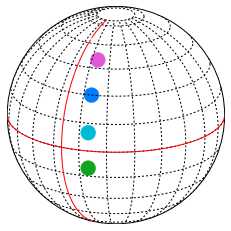

In [12]:
plot_mouse_spherical3(coords,projection='ortho',colors=sns.color_palette())
#plt.gcf().savefig('/Volumes/DATA2/behavior/figures/spherical_withColors.eps',format='eps')

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# plot performance

##### plot a single day example

In [13]:
##not completed yet. should do from an NWB.

# luminance contrast 

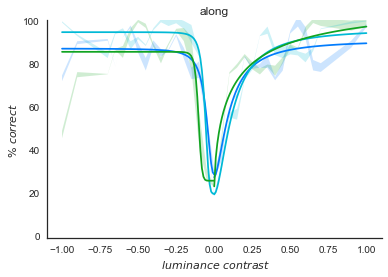

In [10]:
p30=[];p10=[];n10=[]
smooth=0.7

for mouse in ['227383_2', '227399']:#df_p30_uncorrected.mouse_id.unique():
    p30.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['p30_uncorrected'])[0][1]*100.,(0,32),(0,32),smooth=0.,return_line=True,normalize_fp=False),smooth))
    p10.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['p10_uncorrected'])[0][1]*100.,(0,32),(0,32),smooth=0.,return_line=True,normalize_fp=False),smooth))
    n10.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['n10_uncorrected'])[0][1]*100.,(0,32),(0,32),smooth=0.,return_line=True,normalize_fp=False),smooth))

# a = np.mean(p30,axis=0)
# s = np.std(p30,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
# plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[2])
# a = np.mean(p10,axis=0)
# s = np.std(p10,axis=0)/ np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
# plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[1])
# a = np.mean(n10,axis=0)
# s = np.std(n10,axis=0)/ np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
# plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[0])
# ax = plt.gca()
# ax.set_ylim(0,100)
# #ax.set_xlim(-1,1)
# ax.set_ylabel(r'$\%\ correct$')
# ax.set_xlabel(r'$\Delta\ green$')
# ax.set_title('no UV change')
# cleanAxes(ax,bottomLabels=True,leftLabels=True)
# ax.legend()

lum_contrast ={}
lum_contrast['p30']={};
lum_contrast['p30']['data']=p30;
lum_contrast['p30']['mean']=np.mean(p30,axis=0);
lum_contrast['p30']['sem']=np.std(p30,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()));
#lum_contrast['p30']['mean_folded']=np.mean(np.array([np.vstack((m[:17][::-1],m[16:])) for m in p30]).reshape(8,17),axis=0)
#lum_contrast['p30']['sem_folded']=np.std(np.array([np.vstack((m[:17][::-1],m[16:])) for m in p30]).reshape(8,17),axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique())*2.);

lum_contrast['p10']={};
lum_contrast['p10']['data']=p10;
lum_contrast['p10']['mean']=np.mean(p10,axis=0);
lum_contrast['p10']['sem']=np.std(p10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()));
#lum_contrast['p10']['mean_folded']=np.mean(np.array([np.vstack((m[:17][::-1],m[16:])) for m in p10]).reshape(8,17),axis=0)
#lum_contrast['p10']['sem_folded']=np.std(np.array([np.vstack((m[:17][::-1],m[16:])) for m in p10]).reshape(8,17),axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique())*2.);

lum_contrast['n10']={};
lum_contrast['n10']['data']=n10;
lum_contrast['n10']['mean']=np.mean(n10,axis=0);
lum_contrast['n10']['sem']=np.std(n10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()));
#lum_contrast['n10']['mean_folded']=np.mean(np.array([np.vstack((m[:17][::-1],m[16:])) for m in n10]).reshape(8,17),axis=0)
#lum_contrast['n10']['sem_folded']=np.std(np.array([np.vstack((m[:17][::-1],m[16:])) for m in n10]).reshape(8,17),axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique())*2.);


plt.figure()
(x,y) = (0,32),(0,32)
p3 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['p30_uncorrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=False),smooth)
p3s = np.std(p30,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
p1 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['p10_uncorrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=False),smooth)
p1s = np.std(p10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
n1 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['n10_uncorrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=False),smooth)
n1s = np.std(n10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
errs = np.array([n1s,p1s,p3s])/2.
for i,p in enumerate([n1,p1,p3]):
    plt.fill_between(contrasts,p-errs[i],p+errs[i],alpha=0.2)

ax = plt.gca()
ax.set_ylim(-1,100)
#ax.set_xlim(-1,1)
ax.set_ylabel(r'$\%\ correct$')
ax.set_xlabel(r'$\ luminance\ contrast$')
ax.set_title('along')
cleanAxes(ax,bottomLabels=True,leftLabels=True)
ax.legend()

fit_bounds = [(10,0,0.,0.1),
              (5035,90,.99,9.)]

a = p3#np.mean(p30,axis=0)
fit_ON = fit_hyperbolicratio(contrasts[16:],a[16:],np.min(a[16:]),np.max(a[16:])-np.min(a[16:]),contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])))[0][0]],3,
                             bounds=fit_bounds)
ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[2]);
x=contrasts[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],np.min(a[:17][::-1]),np.max(a[:17][::-1])-np.min(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])))[0][0]],3,
                              bounds=False)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[2]);
lum_contrast['p30']['fit_ON']=fit_ON
lum_contrast['p30']['fit_OFF']=fit_OFF

a = p1#np.mean(p10,axis=0)
fit_ON = fit_hyperbolicratio(contrasts[16:],a[16:],np.min(a[16:]),np.max(a[16:])-np.min(a[16:]),contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])))[0][0]],3,
                             bounds=fit_bounds)
ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[1]);
x=contrasts[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],np.min(a[:17][::-1]),np.max(a[:17][::-1])-np.min(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])))[0][0]],3,
                              bounds=fit_bounds)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[1]);
lum_contrast['p10']['fit_ON']=fit_ON
lum_contrast['p10']['fit_OFF']=fit_OFF

a = n1#np.mean(n10,axis=0)
fit_ON = fit_hyperbolicratio(contrasts[16:],a[16:],np.min(a[16:]),np.max(a[16:])-np.min(a[16:]),contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])))[0][0]],3,
                             bounds=fit_bounds)
ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[0]);
x=contrasts[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],np.min(a[:17][::-1]),np.max(a[:17][::-1])-np.min(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])))[0][0]],3,
                              bounds=fit_bounds)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[0]);
lum_contrast['n10']['fit_ON']=fit_ON
lum_contrast['n10']['fit_OFF']=fit_OFF

#plt.gcf().savefig('/Volumes/DATA2/behavior/figures/luminance_CRFs.eps',format='eps')

{'p10': 0.060453811332589528, 'p30': 0.054600515653664423, 'n10': 0.10375271699332575}
{'p10': 0.12178503251120498, 'p30': 0.1046135250169869, 'n10': 0.11621375924676172}


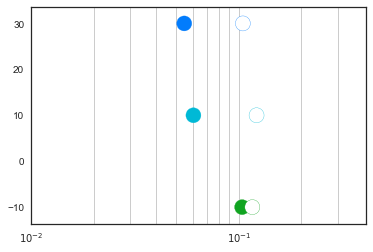

In [12]:
c50s_OFF_lum = dict(zip(lum_contrast.keys(),[fit['fit_OFF'][2] for fit in lum_contrast.values()]))
c50s_ON_lum = dict(zip(lum_contrast.keys(),[fit['fit_ON'][2] for fit in lum_contrast.values()]))
print(c50s_OFF_lum)
print(c50s_ON_lum)

sns.set_style('white')
eles = ['n10','p10','p30']
c50_off=np.array([c50s_OFF_lum[ele] for ele in eles])
c50_on=np.array([c50s_ON_lum[ele] for ele in eles])
plt.scatter(c50_off,[-10,10,30],s=15**2,c=sns.color_palette()[:3])
plt.scatter(c50_on,[-10,10,30],s=15**2,facecolor='w',edgecolor=sns.color_palette()[:3])
plt.xscale('log');plt.xlim(0.01,0.41)
plt.gca().xaxis.grid(True)
dump=plt.gca().xaxis.set_ticks([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3])
#plt.gcf().savefig('/Volumes/DATA2/behavior/figures/luminance_C50s.eps',format='eps')

### green contrast response

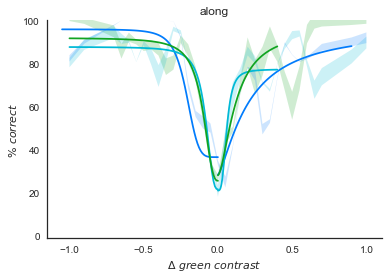

In [13]:
p30=[];p10=[];n10=[]
smooth=0.7

for mouse in ['227383_2', '227399']:#df_p30_uncorrected.mouse_id.unique():
    p30.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['p30_uncorrected'])[0][1]*100.,(0,32),(15,15),smooth=0.,return_line=True,normalize_fp=False),smooth))
    p10.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['p10_uncorrected'])[0][1]*100.,(0,32),(15,15),smooth=0.,return_line=True,normalize_fp=False),smooth))
    n10.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['n10_uncorrected'])[0][1]*100.,(0,32),(15,15),smooth=0.,return_line=True,normalize_fp=False),smooth))

# a = np.mean(p30,axis=0)
# s = np.std(p30,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
# plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[2])
# a = np.mean(p10,axis=0)
# s = np.std(p10,axis=0)/ np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
# plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[1])
# a = np.mean(n10,axis=0)
# s = np.std(n10,axis=0)/ np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
# plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[0])
# ax = plt.gca()
# ax.set_ylim(0,100)
# #ax.set_xlim(-1,1)
# ax.set_ylabel(r'$\%\ correct$')
# ax.set_xlabel(r'$\Delta\ green$')
# ax.set_title('no UV change')
# cleanAxes(ax,bottomLabels=True,leftLabels=True)
# ax.legend()

green_contrast ={}
green_contrast['p30']={};
green_contrast['p30']['data']=p30;
green_contrast['p30']['mean']=np.mean(p30,axis=0);
green_contrast['p30']['sem']=np.std(p30,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()));
# green_contrast['p30']['mean_folded']=np.mean(np.array([np.vstack((m[:17][::-1],m[16:])) for m in p30]).reshape(8,17),axis=0)
# green_contrast['p30']['sem_folded']=np.std(np.array([np.vstack((m[:17][::-1],m[16:])) for m in p30]).reshape(8,17),axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique())*2.);

green_contrast['p10']={};
green_contrast['p10']['data']=p10;
green_contrast['p10']['mean']=np.mean(p10,axis=0);
green_contrast['p10']['sem']=np.std(p10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()));
# green_contrast['p10']['mean_folded']=np.mean(np.array([np.vstack((m[:17][::-1],m[16:])) for m in p10]).reshape(8,17),axis=0)
# green_contrast['p10']['sem_folded']=np.std(np.array([np.vstack((m[:17][::-1],m[16:])) for m in p10]).reshape(8,17),axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique())*2.);

green_contrast['n10']={};
green_contrast['n10']['data']=n10;
green_contrast['n10']['mean']=np.mean(n10,axis=0);
green_contrast['n10']['sem']=np.std(n10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()));
# green_contrast['n10']['mean_folded']=np.mean(np.array([np.vstack((m[:17][::-1],m[16:])) for m in n10]).reshape(8,17),axis=0)
# green_contrast['n10']['sem_folded']=np.std(np.array([np.vstack((m[:17][::-1],m[16:])) for m in n10]).reshape(8,17),axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique())*2.);


plt.figure()
(x,y) = (0,32),(15,15)
p3 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['p30_uncorrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=False),smooth)
p3s = np.std(p30,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
p1 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['p10_uncorrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=False),smooth)
p1s = np.std(p10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
n1 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['n10_uncorrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=False),smooth)
n1s = np.std(n10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
errs = np.array([n1s,p1s,p3s])/2.
for i,p in enumerate([n1,p1,p3]):
    plt.fill_between(contrasts,p-errs[i],p+errs[i],alpha=0.2)

ax = plt.gca()
ax.set_ylim(-1,100)
#ax.set_xlim(-1,1)
ax.set_ylabel(r'$\%\ correct$')
ax.set_xlabel(r'$\Delta\ green\ contrast$')
ax.set_title('along')
cleanAxes(ax,bottomLabels=True,leftLabels=True)
ax.legend()

fit_bounds = [(10,0,0.,0.1),
              (5035,90,.99,9.)]

a = p3#np.mean(p30,axis=0)
fit_ON = fit_hyperbolicratio(contrasts[16:32],a[16:32],np.min(a[16:]),np.max(a[16:])-np.min(a[16:]),contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])))[0][0]],3,
                             bounds=fit_bounds)
ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[2]);
x=contrasts[:18][::-1]*-1+0.05
d=p[:18][::-1]
green_contrast['p30']['fit_OFF']=fit_hyperbolicratio(x,d,
                              np.min(d),
                              d[-1],
                              .05,#x[np.where(np.array(d) > (np.max(d) - np.min(d)))[0][0]],
                              3,
                              bounds=([0,0,0,0],[100,100,1.,10]))
fit_OFF = fit_hyperbolicratio(x,d,np.min(a[:17][::-1]),np.max(a[:17][::-1])-np.min(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])))[0][0]],3,
                              bounds=False)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[2]);
green_contrast['p30']['fit_ON']=fit_ON
green_contrast['p30']['fit_OFF']=fit_OFF

a = p1#np.mean(p10,axis=0)
fit_ON = fit_hyperbolicratio(contrasts[16:25],a[16:25],np.min(a[16:]),np.max(a[16:])-np.min(a[16:]),contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])))[0][0]],3,
                             bounds=fit_bounds)
ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[1]);
x=contrasts[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],np.min(a[:17][::-1]),np.max(a[:17][::-1])-np.min(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])))[0][0]],3,
                              bounds=fit_bounds)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[1]);
green_contrast['p10']['fit_ON']=fit_ON
green_contrast['p10']['fit_OFF']=fit_OFF

a = n1#np.mean(n10,axis=0)
fit_ON = fit_hyperbolicratio(contrasts[16:25],a[16:25],np.min(a[16:]),np.max(a[16:])-np.min(a[16:]),contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])))[0][0]],3,
                             bounds=fit_bounds)
ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[0]);
x=contrasts[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],np.min(a[:17][::-1]),np.max(a[:17][::-1])-np.min(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])))[0][0]],3,
                              bounds=fit_bounds)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[0]);
green_contrast['n10']['fit_ON']=fit_ON
green_contrast['n10']['fit_OFF']=fit_OFF

#plt.gcf().savefig('/Volumes/DATA2/behavior/figures/along_UV_equals_zero.eps',format='eps')

{'p10': 0.083786944863295063, 'p30': 0.21328366062591742, 'n10': 0.10384877686277774}
{'p10': 0.059109103170095434, 'p30': 0.21033177830681163, 'n10': 0.12206737400236554}


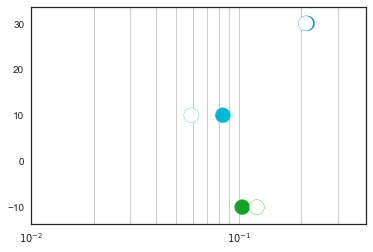

In [14]:
c50s_OFF_lum = dict(zip(green_contrast.keys(),[fit['fit_OFF'][2] for fit in green_contrast.values()]))
c50s_ON_lum = dict(zip(green_contrast.keys(),[fit['fit_ON'][2] for fit in green_contrast.values()]))
print(c50s_OFF_lum)
print(c50s_ON_lum)

sns.set_style('white')
eles = ['n10','p10','p30']
c50_off=np.array([c50s_OFF_lum[ele] for ele in eles])
c50_on=np.array([c50s_ON_lum[ele] for ele in eles])
plt.scatter(c50_off,[-10,10,30],s=15**2,c=sns.color_palette()[:3])
plt.scatter(c50_on,[-10,10,30],s=15**2,facecolor='w',edgecolor=sns.color_palette()[:3])
plt.xscale('log');plt.xlim(0.01,0.41)
plt.gca().xaxis.grid(True)
dump=plt.gca().xaxis.set_ticks([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3])
#plt.gcf().savefig('/Volumes/DATA2/behavior/figures/green_C50s.eps',format='eps')

In [11]:
c50s_OFF_green = dict(zip(green_contrast.keys(),[fit['fit_OFF'][2]/2. for fit in green_contrast.values()]))
c50s_ON_green = dict(zip(green_contrast.keys(),[fit['fit_ON'][2]/2. for fit in green_contrast.values()]))
print(c50s_OFF_green)
print(c50s_ON_green)

{'p10': 0.041893472431647531, 'p30': 0.096824902442645078, 'n10': 0.051924388431388871}
{'p10': 0.032021503354318609, 'p30': 0.1158196526299229, 'n10': 0.10679106447595868}


### UV contrast response

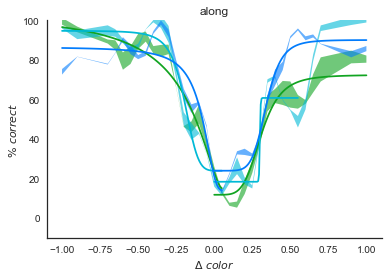

In [15]:
f1=[];f2=[];f3=[]
smooth=0.8
normalize_fp=False
for mouse in ['227383_2', '227399']:
    f1.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['p30_uncorrected'])[0][1]*100.,(15,15),(0,32),smooth=0.,return_line=True,normalize_fp=normalize_fp),smooth))
    f2.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['p10_uncorrected'])[0][1]*100.,(15,15),(0,32),smooth=0.,return_line=True,normalize_fp=normalize_fp),smooth))
    f3.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['n10_uncorrected'])[0][1]*100.,(15,15),(0,32),smooth=0.,return_line=True,normalize_fp=normalize_fp),smooth))
# a = np.mean(f1,axis=0)
# s = np.std(f1,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
# plt.errorbar(deltas,a,yerr=s,color=sns.color_palette()[2])
# a = np.mean(f2,axis=0)
# s = np.std(f2,axis=0)/ np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
# plt.errorbar(deltas,a,yerr=s,color=sns.color_palette()[1])
# a = np.mean(f3,axis=0)
# s = np.std(f3,axis=0)/ np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
# plt.errorbar(deltas,a,yerr=s,color=sns.color_palette()[0])
# ax = plt.gca()
# ax.set_ylim(-10,100)
# #ax.set_xlim(-1,1)
# ax.set_ylabel(r'$\%\ correct$')
# ax.set_xlabel(r'$\Delta\ UV$')
# ax.set_title('no green change')
# cleanAxes(ax,bottomLabels=True,leftLabels=True)

uv_contrast ={}
uv_contrast['p30']={};
uv_contrast['p30']['data']=f1;
uv_contrast['p30']['mean']=np.mean(f1,axis=0);
uv_contrast['p30']['sem']=np.std(f1,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()));
# uv_contrast['p30']['mean_folded']=np.mean(np.array([np.vstack((m[:17][::-1],m[16:])) for m in f1]).reshape(8,17),axis=0)
# uv_contrast['p30']['sem_folded']=np.std(np.array([np.vstack((m[:17][::-1],m[16:])) for m in f1]).reshape(8,17),axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique())*2.);

uv_contrast['p10']={};
uv_contrast['p10']['data']=f2;
uv_contrast['p10']['mean']=np.mean(f2,axis=0);
uv_contrast['p10']['sem']=np.std(f2,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()));
# uv_contrast['p10']['mean_folded']=np.mean(np.array([np.vstack((m[:17][::-1],m[16:])) for m in f2]).reshape(8,17),axis=0)
# uv_contrast['p10']['sem_folded']=np.std(np.array([np.vstack((m[:17][::-1],m[16:])) for m in f2]).reshape(8,17),axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique())*2.);

uv_contrast['n10']={};
uv_contrast['n10']['data']=f3;
uv_contrast['n10']['mean']=np.mean(f3,axis=0);
uv_contrast['n10']['sem']=np.std(f3,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()));
# uv_contrast['n10']['mean_folded']=np.mean(np.array([np.vstack((m[:17][::-1],m[16:])) for m in f3]).reshape(8,17),axis=0)
# uv_contrast['n10']['sem_folded']=np.std(np.array([np.vstack((m[:17][::-1],m[16:])) for m in f3]).reshape(8,17),axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique())*2.);


plt.figure()
(x,y) = (15,15),(0,32)
p3 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['p30_uncorrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=normalize_fp),smooth)
p3s = np.std(f1,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
p1 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['p10_uncorrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=normalize_fp),smooth)
p1s = np.std(f2,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
n1 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['n10_uncorrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=normalize_fp),smooth)
n1s = np.std(f3,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
errs = np.array([n1s,p1s,p3s])/2.
for i,p in enumerate([n1,p1,p3]):
    plt.fill_between(contrasts,p-errs[i],p+errs[i],alpha=0.6)

ax = plt.gca()
ax.set_ylim(-10,100)
#ax.set_xlim(-1,1)
ax.set_ylabel(r'$\%\ correct$')
ax.set_xlabel(r'$\Delta\ color$')
ax.set_title('along')
cleanAxes(ax,bottomLabels=True,leftLabels=True)
ax.legend()

eles = ['n10','p10','p30']
for i,p in enumerate([n1,p1,p3]):
    if eles[i]=='p30':
        bounds=False
    else:
        bounds = False#[np.min(p)-1,-np.inf,-np.inf,-np.inf],[np.min(p)+10,np.inf,np.inf,np.inf]
    if eles[i]=='p10':
        x=contrasts[16:28]
        d=p[16:28]
    else:
        x=contrasts[16:]
        d=p[16:]
    uv_contrast[eles[i]]['fit_ON'] = fit_hyperbolicratio(x,d,
                                 np.min(p[16:]),
                                 np.max(p[16:])-np.min(p[16:]),
                                 contrasts[16:][np.where(np.array(p[16:]) > (np.max(p[16:]) - np.min(p[16:])))[0][0]],
                                 3,
                                 bounds=bounds)
    x=contrasts[:18][::-1]*-1+0.05
    d=p[:18][::-1]
    uv_contrast[eles[i]]['fit_OFF']=fit_hyperbolicratio(x,d,
                                  np.min(d),
                                  d[-1],
                                  .05,#x[np.where(np.array(d) > (np.max(d) - np.min(d)))[0][0]],
                                  3,
                                  bounds=([0,0,0,0],[100,100,1.,10]))
    #uv_contrast[eles[i]]['fit_OFF'][5][0]=uv_contrast[eles[i]]['fit_OFF'][5][0]-0.1
    ax.plot(uv_contrast[eles[i]]['fit_ON'][5][0],uv_contrast[eles[i]]['fit_ON'][5][1],color=sns.color_palette()[i]);
    ax.plot((uv_contrast[eles[i]]['fit_OFF'][5][0] - 0.05)*-1,uv_contrast[eles[i]]['fit_OFF'][5][1],color=sns.color_palette()[i]);

#plt.gca().set_xscale('log')
#plt.gca().set_xlim(-2,2)
#plt.gcf().savefig('/Volumes/DATA2/behavior/figures/along_UV_equals_zero.eps',format='eps')
#plt.gcf().savefig('/Volumes/DATA2/behavior/figures/along_green_equals_zero.eps',format='eps')

{'p10': 0.1962655046370988, 'p30': 0.078349257897793026, 'n10': 0.18223483172435495}
{'p10': 0.29978144383452471, 'p30': 0.34214989091587694, 'n10': 0.30885256214348522}


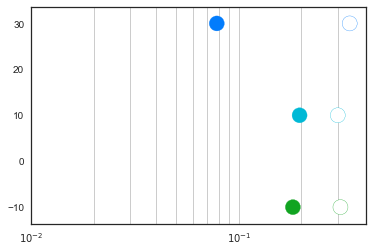

In [16]:
c50s_OFF_lum = dict(zip(uv_contrast.keys(),[fit['fit_OFF'][2]-0.05 for fit in uv_contrast.values()]))
c50s_ON_lum = dict(zip(uv_contrast.keys(),[fit['fit_ON'][2] for fit in uv_contrast.values()]))
print(c50s_OFF_lum)
print(c50s_ON_lum)

sns.set_style('white')
eles = ['n10','p10','p30']
c50_off=np.array([c50s_OFF_lum[ele] for ele in eles])
c50_on=np.array([c50s_ON_lum[ele] for ele in eles])
plt.scatter(c50_off,[-10,10,30],s=15**2,c=sns.color_palette()[:3])
plt.scatter(c50_on,[-10,10,30],s=15**2,facecolor='w',edgecolor=sns.color_palette()[:3])
plt.xscale('log');plt.xlim(0.01,0.41)
plt.gca().xaxis.grid(True)
dump=plt.gca().xaxis.set_ticks([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3])
#plt.gcf().savefig('/Volumes/DATA2/behavior/figures/uv_C50s.eps',format='eps')

In [98]:
c50s_OFF_UV = dict(zip(uv_contrast.keys(),[fit['fit_OFF'][2]/2. for fit in uv_contrast.values()]))
c50s_ON_UV = dict(zip(uv_contrast.keys(),[fit['fit_ON'][2]/2. for fit in uv_contrast.values()]))
print(c50s_OFF_UV)
print(c50s_ON_UV)

{'p10': 0.11586373182231562, 'p30': 0.069891091562198304, 'n10': 0.16518856212422284}
{'p10': 0.19880542747528682, 'p30': 0.16864987546182131, 'n10': 0.17738628119481523}


<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# identify equiluminant responses
## fit ellipses:
### get major axis:
###    the orientation is the equiluminance line (like a macadam ellipse)
###    the length of the major axis is the sensitivity along the UV-green axis; compare this across elevations
### also, plot performance along this major axis

2.25389307803
3.62851775253
3.45420808258


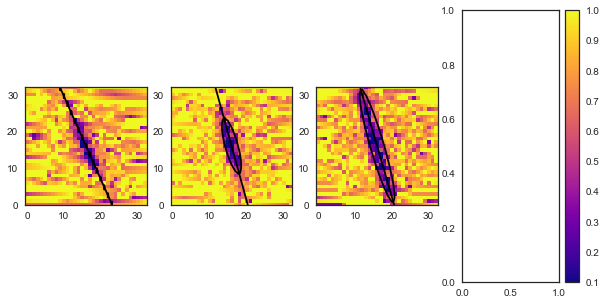

In [73]:
fit_results_uncorrected={}
smooth=0.1
f,ax = plt.subplots(1,4,figsize=(10,5))

data_to_fit = smoothRF(performance['p30_uncorrected'][0][1],smooth)
popt,pcov,space_fit = fit_2Dgauss_centerFixed(data_to_fit,
                                                 (16,16),
                                                 width_guess=2,
                                                 height_guess=10)
fit_results_uncorrected['p30_uncorrected'] = popt,pcov,space_fit
ax[0].contour(space_fit[0],space_fit[1],space_fit[2],levels=[0.5],cmap=plt.cm.magma)
ax[0].imshow(data_to_fit,cmap=plt.cm.plasma,clim=(0.1,1.));ax[0].set_ylim(0,32)
(x,y)=line_points(fit_results_uncorrected['p30_uncorrected']);ax[0].plot(x,y,'k')
print 32/(x[1]-x[0])

data_to_fit = smoothRF(performance['p10_uncorrected'][0][1],smooth)
popt,pcov,space_fit = fit_2Dgauss_centerFixed(data_to_fit,
                                                 (16,16),
                                                 width_guess=5,
                                                 height_guess=16)
fit_results_uncorrected['p10_uncorrected'] = popt,pcov,space_fit
ax[1].contour(space_fit[0],space_fit[1],space_fit[2],levels=[0.5],cmap=plt.cm.magma)
ax[1].imshow(data_to_fit,cmap=plt.cm.plasma,clim=(0.1,1.));ax[1].set_ylim(0,32)
(x,y)=line_points(fit_results_uncorrected['p10_uncorrected']);ax[1].plot(x,y,'k')
print 32/(x[1]-x[0])

data_to_fit = smoothRF(performance['n10_uncorrected'][0][1],smooth)
popt,pcov,space_fit = fit_2Dgauss_centerFixed(data_to_fit,
                                                 (16,16),
                                                 width_guess=4,
                                                 height_guess=24)
fit_results_uncorrected['n10_uncorrected'] = popt,pcov,space_fit
ax[2].contour(space_fit[0],space_fit[1],space_fit[2],levels=[0.5],cmap=plt.cm.magma)
c=ax[2].imshow(data_to_fit,cmap=plt.cm.plasma,clim=(0.1,1.));ax[2].set_ylim(0,32)
(x,y)=line_points(fit_results_uncorrected['n10_uncorrected']);ax[2].plot(x,y,'k')
print 32/(x[1]-x[0])

plt.gcf().colorbar(c)
plt.gcf().savefig('/Volumes/DATA2/behavior/figures/uncorrected_unsmoothed.eps',format='eps')

In [47]:
p30=[];p10=[];n10=[]
smooth=.8
normalize_fp=False
for mouse in df_p30_uncorrected.mouse_id.unique():
    (x,y) = line_points(fit_results_uncorrected['p30_uncorrected'])
    p30.append(extract_line(performance[mouse]['p30_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp))
    (x,y) = line_points(fit_results_uncorrected['p10_uncorrected'])
    p10.append(extract_line(performance[mouse]['p10_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp))
    (x,y) = line_points(fit_results_uncorrected['n10_uncorrected'])
    n10.append(extract_line(performance[mouse]['n10_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp))
a = np.mean(p30,axis=0)
s = np.std(p30,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[2])
a = np.mean(p10,axis=0)
s = np.std(p10,axis=0)/ np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[1])
a = np.mean(n10,axis=0)
s = np.std(n10,axis=0)/ np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[0])

plt.figure()
smooth=0.
(x,y) = line_points(fit_results_uncorrected['p30_uncorrected'])
p3 = gaussian_filter1d(extract_line(performance['p30_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp,missing='nearest'),1.)
p3s = np.std(p30,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
(x,y) = line_points(fit_results_uncorrected['p10_uncorrected'])
p1 = gaussian_filter1d(extract_line(performance['p10_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp,missing='nearest'),1.)
p1s = np.std(p10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
(x,y) = line_points(fit_results_uncorrected['n10_uncorrected'])
n1 = gaussian_filter1d(extract_line(performance['n10_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp,missing='nearest'),1.)
n1s = np.std(n10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
errs = np.array([n1s,p1s,p3s])/2.
for i,p in enumerate([n1,p1,p3]):
    plt.fill_between(deltas,p-errs[i],p+errs[i],alpha=0.6)

ax = plt.gca()
ax.set_ylim(-10,100)
#ax.set_xlim(-1,1)
ax.set_ylabel(r'$\%\ correct$')
ax.set_xlabel(r'$+UV\ \ \Delta\ color\  \ +green$')
ax.set_title('along')
cleanAxes(ax,bottomLabels=True,leftLabels=True)
ax.legend()

a = p3#np.mean(p30,axis=0)
fit_ON = fit_hyperbolicratio(deltas[16:],a[16:],0,np.max(a[16:]),contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])) / 2.)[0][0]],3,
                             fix_zero=True)
ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[2]);
x=deltas[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],0,np.max(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])) / 2.)[0][0]],3,
                              fix_zero=True)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[2]);
#plt.plot(contrasts,a)


a = p1#np.mean(p10,axis=0)
fit_ON = fit_hyperbolicratio(deltas[16:],a[16:],0,np.max(a[16:]),deltas[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])) / 2.)[0][0]],3,
                             fix_zero=True)
ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[1]);
x=deltas[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],0,np.max(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])) / 2.)[0][0]],3,
                              fix_zero=True)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[1]);
#plt.plot(deltas,a)

# a = n1#np.mean(n10,axis=0)
# fit_ON = fit_hyperbolicratio(deltas[16:],a[16:],0,np.max(a[16:]),deltas[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])) / 2.)[0][0]],3,
#                              fix_zero=True)
# ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[0]);
# x=deltas[:17][::-1]*-1
# fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],0,np.max(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])) / 2.)[0][0]],3,
#                               fix_zero=True)
# ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[0]);
#plt.plot(deltas,a)

#plt.gca().set_xscale('log')
#plt.gca().set_xlim(-2,2)
plt.gcf().savefig('/Volumes/DATA2/behavior/figures/uncorrected_hue.eps',format='eps')

KeyError: 'p30_uncorrected'

In [48]:
p30=[];p10=[];n10=[]
smooth=.8
normalize_fp=False
for mouse in df_p30_uncorrected.mouse_id.unique():
    (x,y) = line_points(fit_results_uncorrected['p30_uncorrected'])
    p30.append(extract_line(performance[mouse]['p30_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp))
    (x,y) = line_points(fit_results_uncorrected['p10_uncorrected'])
    p10.append(extract_line(performance[mouse]['p10_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp))
    (x,y) = line_points(fit_results_uncorrected['n10_uncorrected'])
    n10.append(extract_line(performance[mouse]['n10_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp))
a = np.mean(p30,axis=0)
s = np.std(p30,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[2])
a = np.mean(p10,axis=0)
s = np.std(p10,axis=0)/ np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[1])
a = np.mean(n10,axis=0)
s = np.std(n10,axis=0)/ np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
plt.errorbar(contrasts,a,yerr=s,color=sns.color_palette()[0])

plt.figure()
smooth=0.
(x,y) = line_points(fit_results_uncorrected['p30_uncorrected'])
p3 = gaussian_filter1d(extract_line(performance['p30_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp,missing='nearest'),1.)
p3s = np.std(p30,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
(x,y) = line_points(fit_results_uncorrected['p10_uncorrected'])
p1 = gaussian_filter1d(extract_line(performance['p10_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp,missing='nearest'),1.)
p1s = np.std(p10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
(x,y) = line_points(fit_results_uncorrected['n10_uncorrected'])
n1 = gaussian_filter1d(extract_line(performance['n10_uncorrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp,missing='nearest'),1.)
n1s = np.std(n10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
errs = np.array([n1s,p1s,p3s])/2.
for i,p in enumerate([n1,p1,p3]):
    plt.fill_between(deltas,p-errs[i],p+errs[i],alpha=0.6)

ax = plt.gca()
ax.set_ylim(-10,100)
#ax.set_xlim(-1,1)
ax.set_ylabel(r'$\%\ correct$')
ax.set_xlabel(r'$+UV\ \ \Delta\ color\  \ +green$')
ax.set_title('along')
cleanAxes(ax,bottomLabels=True,leftLabels=True)
ax.legend()

a = p3#np.mean(p30,axis=0)
fit_ON = fit_hyperbolicratio(deltas[16:],a[16:],0,np.max(a[16:]),contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])) / 2.)[0][0]],3,
                             fix_zero=True)
ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[2]);
x=deltas[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],0,np.max(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])) / 2.)[0][0]],3,
                              fix_zero=True)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[2]);
#plt.plot(contrasts,a)


a = p1#np.mean(p10,axis=0)
fit_ON = fit_hyperbolicratio(deltas[16:],a[16:],0,np.max(a[16:]),deltas[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])) / 2.)[0][0]],3,
                             fix_zero=True)
ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[1]);
x=deltas[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],0,np.max(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])) / 2.)[0][0]],3,
                              fix_zero=True)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[1]);
#plt.plot(deltas,a)

# a = n1#np.mean(n10,axis=0)
# fit_ON = fit_hyperbolicratio(deltas[16:],a[16:],0,np.max(a[16:]),deltas[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])) / 2.)[0][0]],3,
#                              fix_zero=True)
# ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[0]);
# x=deltas[:17][::-1]*-1
# fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],0,np.max(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])) / 2.)[0][0]],3,
#                               fix_zero=True)
# ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[0]);
#plt.plot(deltas,a)

#plt.gca().set_xscale('log')
#plt.gca().set_xlim(-2,2)
plt.gcf().savefig('/Volumes/DATA2/behavior/figures/uncorrected_hue.eps',format='eps')

KeyError: 'p30_uncorrected'

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# based on the angles of ellipse fits above, adjust color balance
# repeat task

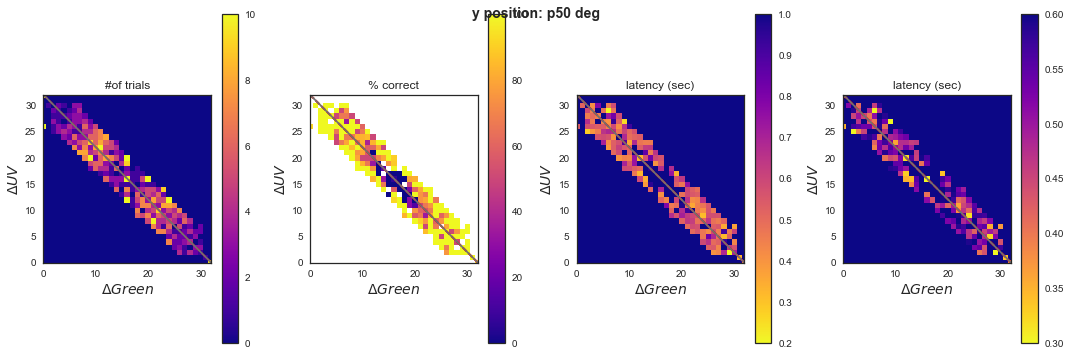

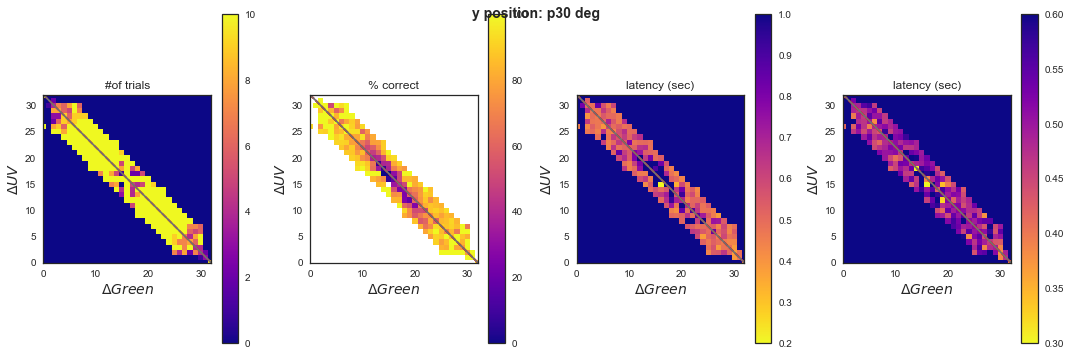

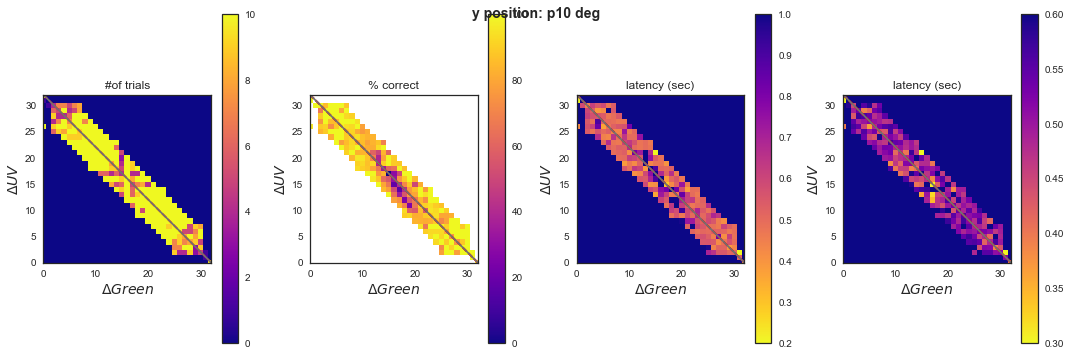

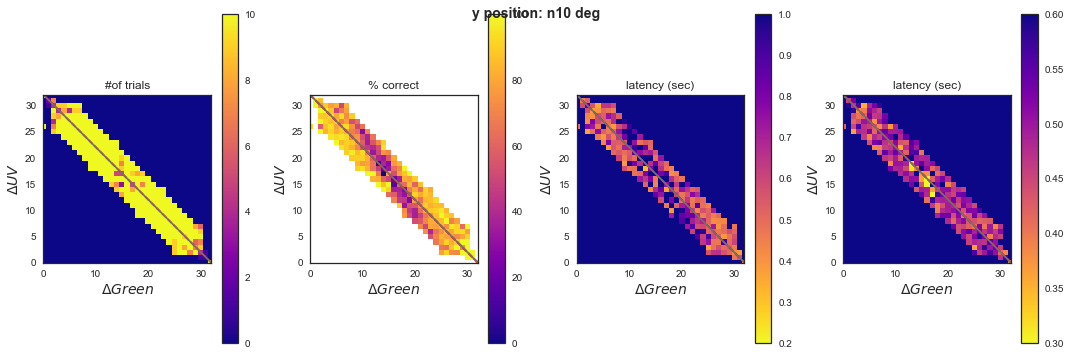

In [53]:
f=plot_color_performace_matrices(performance['p50_corrected'],title='p50')
f=plot_color_performace_matrices(performance['p30_corrected'],title='p30')
f=plot_color_performace_matrices(performance['p10_corrected'],title='p10')
f=plot_color_performace_matrices(performance['n10_corrected'],title='n10')

## fit ellipses here, too.

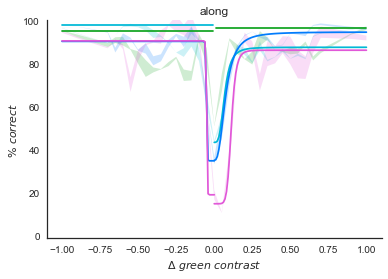

In [35]:
p50=[];p30=[];p10=[];n10=[]
smooth=0.7

for mouse in df_p50_corrected.mouse_id.unique():
    p50.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['p50_corrected'])[0][1]*100.,(0,32),(0,32),smooth=0.,return_line=True,normalize_fp=False),smooth))
    p30.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['p30_corrected'])[0][1]*100.,(0,32),(0,32),smooth=0.,return_line=True,normalize_fp=False),smooth))
    p10.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['p10_corrected'])[0][1]*100.,(0,32),(0,32),smooth=0.,return_line=True,normalize_fp=False),smooth))
    n10.append(gaussian_filter1d(extract_line(clean_performance_matrices(performance[mouse]['n10_corrected'])[0][1]*100.,(0,32),(0,32),smooth=0.,return_line=True,normalize_fp=False),smooth))

plt.figure()
(x,y) = (0,32),(0,32)
p5 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['p50_corrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=False),smooth)
p5s = np.std(p50,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
p3 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['p30_corrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=False),smooth)
p3s = np.std(p30,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
p1 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['p10_corrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=False),smooth)
p1s = np.std(p10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
n1 = gaussian_filter1d(extract_line(clean_performance_matrices(performance['n10_corrected'])[0][1]*100.,x,y,smooth=0.,return_line=True,normalize_fp=False),smooth)
n1s = np.std(n10,axis=0) / np.sqrt(len(df_p30_uncorrected.mouse_id.unique()))
errs = np.array([n1s,p1s,p3s,p5s])/2.
for i,p in enumerate([n1,p1,p3,p5]):
    plt.fill_between(contrasts,p-errs[i],p+errs[i],alpha=0.2)

ax = plt.gca()
ax.set_ylim(-1,100)
#ax.set_xlim(-1,1)
ax.set_ylabel(r'$\%\ correct$')
ax.set_xlabel(r'$\Delta\ green\ contrast$')
ax.set_title('along')
cleanAxes(ax,bottomLabels=True,leftLabels=True)
ax.legend()

fit_bounds = [(10,0,0.,0.1),
              (5035,90,.99,9.)]
lum_contrast_c={}
eles = ['n10','p10','p30','p50']
for i,p in enumerate([n1,p1,p3,p5]):
    lum_contrast_c[eles[i]]={}
    lum_contrast_c[eles[i]]['fit_ON'],lum_contrast_c[eles[i]]['fit_OFF']=fit_contrast_(contrasts,p)
    ax.plot(lum_contrast_c[eles[i]]['fit_ON'][5][0],lum_contrast_c[eles[i]]['fit_ON'][5][1],color=sns.color_palette()[i]);
    ax.plot(lum_contrast_c[eles[i]]['fit_OFF'][5][0]*-1,lum_contrast_c[eles[i]]['fit_OFF'][5][1],color=sns.color_palette()[i]);

    
# a = p3#np.mean(p30,axis=0)
# fit_ON = fit_hyperbolicratio(contrasts[16:],a[16:],np.min(a[16:]),np.max(a[16:])-np.min(a[16:]),contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])))[0][0]],3,
#                              bounds=fit_bounds)
# ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[2]);
# x=contrasts[:17][::-1]*-1
# fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],np.min(a[:17][::-1]),np.max(a[:17][::-1])-np.min(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])))[0][0]],3,
#                               bounds=False)
# ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[2]);
# lum_contrast['p30']['fit_ON']=fit_ON
# lum_contrast['p30']['fit_OFF']=fit_OFF

# a = p1#np.mean(p10,axis=0)
# fit_ON = fit_hyperbolicratio(contrasts[16:],a[16:],np.min(a[16:]),np.max(a[16:])-np.min(a[16:]),contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])))[0][0]],3,
#                              bounds=fit_bounds)
# ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[1]);
# x=contrasts[:17][::-1]*-1
# fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],np.min(a[:17][::-1]),np.max(a[:17][::-1])-np.min(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])))[0][0]],3,
#                               bounds=fit_bounds)
# ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[1]);
# lum_contrast['p10']['fit_ON']=fit_ON
# lum_contrast['p10']['fit_OFF']=fit_OFF

# a = n1#np.mean(n10,axis=0)
# fit_ON = fit_hyperbolicratio(contrasts[16:],a[16:],np.min(a[16:]),np.max(a[16:])-np.min(a[16:]),contrasts[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])))[0][0]],3,
#                              bounds=fit_bounds)
# ax.plot(fit_ON[5][0],fit_ON[5][1],color=sns.color_palette()[0]);
# x=contrasts[:17][::-1]*-1
# fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],np.min(a[:17][::-1]),np.max(a[:17][::-1])-np.min(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])))[0][0]],3,
#                               bounds=fit_bounds)
# ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1],color=sns.color_palette()[0]);
# lum_contrast['n10']['fit_ON']=fit_ON
# lum_contrast['n10']['fit_OFF']=fit_OFF

#plt.gcf().savefig('/Volumes/DATA2/behavior/figures/luminance_CRFs.eps',format='eps')

In [39]:
(x0,x1),(y0,y1) = (10,22),(0,32)
num=33
x, y = np.linspace(x0, x1, num), np.linspace(y0, y1, num)
g=np.vstack((x,y))

In [40]:
g.shape

(2, 33)

In [41]:
g

array([[ 10.   ,  10.375,  10.75 ,  11.125,  11.5  ,  11.875,  12.25 ,
         12.625,  13.   ,  13.375,  13.75 ,  14.125,  14.5  ,  14.875,
         15.25 ,  15.625,  16.   ,  16.375,  16.75 ,  17.125,  17.5  ,
         17.875,  18.25 ,  18.625,  19.   ,  19.375,  19.75 ,  20.125,
         20.5  ,  20.875,  21.25 ,  21.625,  22.   ],
       [  0.   ,   1.   ,   2.   ,   3.   ,   4.   ,   5.   ,   6.   ,
          7.   ,   8.   ,   9.   ,  10.   ,  11.   ,  12.   ,  13.   ,
         14.   ,  15.   ,  16.   ,  17.   ,  18.   ,  19.   ,  20.   ,
         21.   ,  22.   ,  23.   ,  24.   ,  25.   ,  26.   ,  27.   ,
         28.   ,  29.   ,  30.   ,  31.   ,  32.   ]])

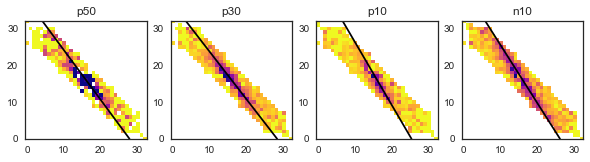

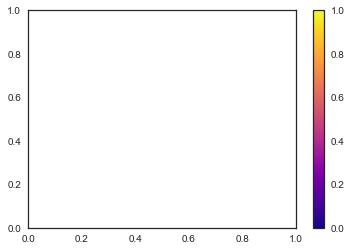

In [248]:
fit_results_corrected={}
smooth=0.1
f,ax = plt.subplots(1,4,figsize=(10,4))

d1 = performance['p50_corrected'][0][1]
data_to_fit = copy.deepcopy(d1)
mask = np.isnan(data_to_fit);data_to_fit[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), data_to_fit[~mask])
data_to_fit = smoothRF(data_to_fit,smooth)
popt,pcov,space_fit = fit_2Dgauss_centerFixed(data_to_fit,
                                                 (16,16),
                                                 width_guess=5,
                                                 height_guess=16)
fit_results_corrected['p50_corrected'] = popt,pcov,space_fit
ax[0].contour(space_fit[0],space_fit[1],space_fit[2],levels=[0.5],cmap=plt.cm.magma)
data_to_fit[mask]=np.nan
ax[0].imshow(data_to_fit,cmap=plt.cm.plasma);ax[0].set_ylim(0,32)
ax[0].set_title('p50')
(x,y)=line_points(fit_results_corrected['p50_corrected']);ax[0].plot(x,y,'k')

d1 = performance['p30_corrected'][0][1]
data_to_fit = copy.deepcopy(d1)
mask = np.isnan(data_to_fit);data_to_fit[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), data_to_fit[~mask])
data_to_fit = smoothRF(data_to_fit,smooth)
popt,pcov,space_fit = fit_2Dgauss_centerFixed(data_to_fit,
                                                 (16,16),
                                                 width_guess=5,
                                                 height_guess=16)
fit_results_corrected['p30_corrected'] = popt,pcov,space_fit
ax[1].contour(space_fit[0],space_fit[1],space_fit[2],levels=[0.5],cmap=plt.cm.magma)
data_to_fit[mask]=np.nan
ax[1].imshow(data_to_fit,cmap=plt.cm.plasma);ax[1].set_ylim(0,32)
ax[1].set_title('p30')
(x,y)=line_points(fit_results_corrected['p30_corrected']);ax[1].plot(x,y,'k')


d1 = performance['p10_corrected'][0][1]
data_to_fit = copy.deepcopy(d1)
mask = np.isnan(data_to_fit);data_to_fit[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), data_to_fit[~mask])
data_to_fit = smoothRF(data_to_fit,smooth)
popt,pcov,space_fit = fit_2Dgauss_centerFixed(data_to_fit,
                                                 (16,16),
                                                 width_guess=5,
                                                 height_guess=16)
fit_results_corrected['p10_corrected'] = popt,pcov,space_fit
ax[2].contour(space_fit[0],space_fit[1],space_fit[2],levels=[0.5],cmap=plt.cm.magma)
data_to_fit[mask]=np.nan
ax[2].imshow(data_to_fit,cmap=plt.cm.plasma);ax[2].set_ylim(0,32)
ax[2].set_title('p10')
(x,y)=line_points(fit_results_corrected['p10_corrected']);ax[2].plot(x,y,'k')


d1 = performance['n10_corrected'][0][1]
data_to_fit = copy.deepcopy(d1)
mask = np.isnan(data_to_fit);data_to_fit[mask] = np.interp(np.flatnonzero(mask), np.flatnonzero(~mask), data_to_fit[~mask])
data_to_fit = smoothRF(data_to_fit,smooth)
popt,pcov,space_fit = fit_2Dgauss_centerFixed(data_to_fit,
                                                 (16,16),
                                                 width_guess=4,
                                                 height_guess=24)
fit_results_corrected['n10_corrected'] = popt,pcov,space_fit
ax[3].contour(space_fit[0],space_fit[1],space_fit[2],levels=[0.5],cmap=plt.cm.magma)
data_to_fit[mask]=np.nan
c=ax[3].imshow(data_to_fit,cmap=plt.cm.plasma);ax[3].set_ylim(0,32)
ax[3].set_title('n10')
(x,y)=line_points(fit_results_corrected['n10_corrected']);ax[3].plot(x,y,'k')
plt.figure()
plt.gcf().colorbar(c)
f.savefig('/Volumes/DATA2/behavior/figures/corrected_unsmoothed.eps',format='eps')

In [15]:
plt.cm.plasma.set_bad('w')

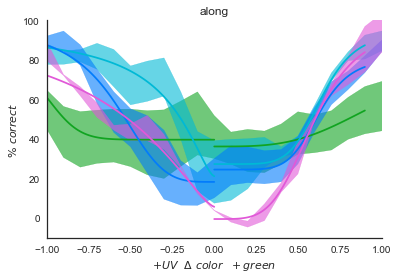

In [266]:
p50=[];p30=[];p10=[];n10=[]

#smooth the individual performance matrices to fit ellipses; use these to estimate error
smooth=1.0
normalize_fp=False
for mouse in df_p30_uncorrected.mouse_id.unique():
    if mouse in df_p50_corrected.mouse_id.unique():
        (x,y) = line_points(fit_results_corrected['p50_corrected'])
        p50.append(extract_line(performance[mouse]['p50_corrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp))
    (x,y) = line_points(fit_results_corrected['p30_corrected'])
    p30.append(extract_line(performance[mouse]['p30_corrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp))
    (x,y) = line_points(fit_results_corrected['p10_corrected'])
    p10.append(extract_line(performance[mouse]['p10_corrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp))
    (x,y) = line_points(fit_results_corrected['n10_corrected'])
    n10.append(extract_line(performance[mouse]['n10_corrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp))
across_mice = {'p50':p50,'p30':p30,'p10':p10,'n10':n10}

#take the fit lines, extract the performance from the unsmoothed matrix
smooth=0.0
ele = 'p30'
(x,y) = line_points(fit_results_corrected[ele+'_corrected'])
mask = extract_line(performance[ele+'_corrected'][0][1]*100.,x,y,smooth=0,return_line=True,normalize_fp=normalize_fp,missing='replace')
mask[:np.max(np.argwhere(np.isnan(mask)).flatten()[np.where(np.argwhere(np.isnan(mask)).flatten()<16)[0]])+1]=np.nan
mask[np.min(np.argwhere(np.isnan(mask)).flatten()[np.where(np.argwhere(np.isnan(mask)).flatten()>16)[0]])-1:]=np.nan
mask = np.invert(np.isnan(mask))
elevations = ['p50','p30','p10','n10'][::-1]
ps = {}
for ele in elevations:
    (x,y) = line_points(fit_results_corrected[ele+'_corrected'])
#     mask = extract_line(performance[ele+'_corrected'][0][1]*100.,x,y,smooth=0,return_line=True,normalize_fp=normalize_fp,missing='replace')
#     mask[:np.max(np.argwhere(np.isnan(mask)).flatten()[np.where(np.argwhere(np.isnan(mask)).flatten()<16)[0]])+1]=np.nan
#     mask[np.min(np.argwhere(np.isnan(mask)).flatten()[np.where(np.argwhere(np.isnan(mask)).flatten()>16)[0]])-1:]=np.nan
#     mask = np.invert(np.isnan(mask))
    ps[ele]={}
    ps[ele]['mean'] = gaussian_filter1d(extract_line(performance[ele+'_corrected'][0][1]*100.,x,y,smooth=smooth,return_line=True,normalize_fp=normalize_fp,missing='nearest'),1.)[mask]
    ps[ele]['sem'] = np.array(np.std(across_mice[ele],axis=0) / np.sqrt(len(df_p50_corrected.mouse_id.unique())))[mask]
    ps[ele]['deltas'] = deltas[mask]
    
##----------------------------------------------------------------------------------------------------------------
#make a plot with line thickness as SEM.
for i,ele in enumerate(elevations):
    p=ps[ele]['mean']
    errs= ps[ele]['sem']
    plt.fill_between(ps[ele]['deltas'],p-errs,p+errs,color=sns.color_palette()[i],alpha=0.6)
#fit with hyperbolic or line and and add to plot
ax = plt.gca()
fits_corrected_color={}
for i,ele in enumerate(elevations):#[n1,p1,p3,p5]):
    #fit_ON, fit_OFF = fit_contrast_(ps[ele]['deltas'],ps[ele]['mean'])#fit_performance(ps[ele]['deltas'],ps[ele]['mean'],fix_zero=False)
    fits_corrected_color[ele]={};
    #fits_corrected_color[ele]['ON']=fit_ON;
    #fits_corrected_color[ele]['OFF']=fit_OFF
    
    z_ind = np.where(ps[ele]['deltas']>0.)[0][0]-1
    one_ind = np.where(ps[ele]['deltas']>1.)[0][0]-1
    neg_one_ind = np.where(ps[ele]['deltas']<-1.)[0][0]+1
    x=ps[ele]['deltas'][z_ind:one_ind]
    d=ps[ele]['mean'][z_ind:one_ind]
    fits_corrected_color[ele]['fit_ON'] = fit_hyperbolicratio(x,d,
                                 0,#np.min(d),
                                 np.max(d)-np.min(d),
                                 .2,#x[np.where(np.array(d) > (np.max(d) - np.min(d)))[0][0]],
                                 3,
                                 bounds=False)
    x=ps[ele]['deltas'][neg_one_ind:z_ind+1][::-1]*-1
    d=ps[ele]['mean'][neg_one_ind:z_ind+1][::-1]
    fits_corrected_color[ele]['fit_OFF']=fit_hyperbolicratio(x,d,
                                  0,#np.min(d),
                                  d[-1],
                                  .05,#x[np.where(np.array(d) > (np.max(d) - np.min(d)))[0][0]],
                                  3,
                                  bounds=([0,0,0,0],[100,100,1.,10]))
    
    
    ax.plot( fits_corrected_color[ele]['fit_ON'][5][0], fits_corrected_color[ele]['fit_ON'][5][1],color=sns.color_palette()[i]);
    ax.plot(fits_corrected_color[ele]['fit_OFF'][5][0]*-1,fits_corrected_color[ele]['fit_OFF'][5][1],color=sns.color_palette()[i]);
ax.set_ylim(-10,100)
ax.set_xlim(-1,1)
ax.set_ylabel(r'$\%\ correct$')
ax.set_xlabel(r'$+UV\ \ \Delta\ color\  \ +green$')
ax.set_title('along')
cleanAxes(ax,bottomLabels=True,leftLabels=True)
ax.legend()
##----------------------------------------------------------------------------------------------------------------
#plt.gcf().savefig('/Volumes/DATA2/behavior/figures/corrected_hue.eps',format='eps')

In [260]:
ps['p30']['deltas'][np.where(ps['p30']['deltas']>0.)[0][0]-1]

0.0

{'p10': 0.13422336285839012, 'n10': 0.49999999999999994, 'p50': 0.30311305202349997, 'p30': 0.29291501758843785}
{'p10': 0.32051106036234567, 'n10': 0.5165983610886079, 'p50': 0.29767716980540287, 'p30': 0.3131509725867665}


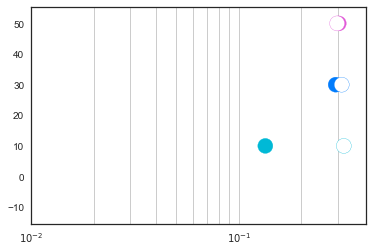

In [271]:
c50s_OFF_lum = dict(zip(fits_corrected_color.keys(),[fit['fit_OFF'][2]/2. for fit in fits_corrected_color.values()]))
c50s_ON_lum = dict(zip(fits_corrected_color.keys(),[fit['fit_ON'][2]/2. for fit in fits_corrected_color.values()]))
print(c50s_OFF_lum)
print(c50s_ON_lum)

sns.set_style('white')
eles = ['n10','p10','p30','p50']
c50_off=np.array([c50s_OFF_lum[ele] for ele in eles])
c50_on=np.array([c50s_ON_lum[ele] for ele in eles])
plt.scatter(c50_off,[-10,10,30,50],s=15**2,c=sns.color_palette()[:4])
plt.scatter(c50_on,[-10,10,30,50],s=15**2,facecolor='w',edgecolor=sns.color_palette()[:4])
plt.xscale('log');plt.xlim(0.01,0.41)
plt.gca().xaxis.grid(True)
plt.gca().xaxis.set_ticks([0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,0.09,0.1,0.2,0.3])
plt.gcf().savefig('/Volumes/DATA2/behavior/figures/color_C50s.eps',format='eps')

In [105]:
uv_contrast['n10'].keys()

['mean_folded', 'fit_OFF', 'sem_folded', 'fit_ON', 'sem', 'data', 'mean']

In [113]:
c50s_OFF_green = dict(zip(green_contrast.keys(),[fit['fit_OFF'][2]/2. for fit in green_contrast.values()]))
c50s_ON_green = dict(zip(green_contrast.keys(),[fit['fit_ON'][2]/2. for fit in green_contrast.values()]))

In [106]:
c50s_OFF_UV = dict(zip(uv_contrast.keys(),[fit['fit_OFF'][2]/2. for fit in uv_contrast.values()]))
c50s_ON_UV = dict(zip(uv_contrast.keys(),[fit['fit_ON'][2]/2. for fit in uv_contrast.values()]))

In [110]:
print(c50s_OFF_UV)
print(c50s_ON_UV)

{'p10': 0.096283197311848687, 'p30': 0.057398272135706835, 'n10': 0.10977286541243814}
{'p10': 0.24976709522317059, 'p30': 0.14756538082559967, 'n10': 0.24747831107967075}


In [114]:
print(c50s_OFF_green)
print(c50s_ON_green)

{'p10': 0.055300087513875031, 'p30': 0.54266176213720807, 'n10': 0.065213613877147705}
{'p10': 0.03971964674754775, 'p30': 9.7347403093041294, 'n10': 17.545907296143394}


In [102]:
c50s_ON_green 

{'n10': 17.545907296143394,
 'p10': 0.03971964674754775,
 'p30': 9.7347403093041294}

In [724]:
c50s_OFF = dict(zip(fits_corrected_color.keys(),[fit['OFF'][2]/2. for fit in fits_corrected_color.values()]))
c50s_ON = dict(zip(fits_corrected_color.keys(),[fit['ON'][2]/2. for fit in fits_corrected_color.values()]))

In [727]:
c50s_ON

{'n10': 0.0,
 'p10': 0.31079130377880493,
 'p30': 0.32976474766012021,
 'p50': 0.29238737071642129}

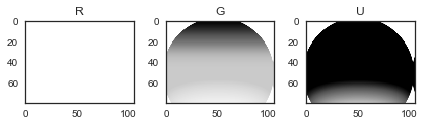

In [8]:
filename =  '/Volumes/Public/Dan/dome/uvProjector2_Warp2_colorAdjustment.data'
warp2 = [];
[warp2.append(row) for row in csv.reader(open(filename))];
rows2 = int(warp2[1][0].split(' ')[1])
cols2 = int(warp2[1][0].split(' ')[0])

intensity_new_r2 = np.zeros((rows2,cols2))
intensity_new_g2 = np.zeros((rows2,cols2))
intensity_new_u2 = np.zeros((rows2,cols2))
intensity_new_alpha = np.zeros((rows2,cols2))

line=0
for i in range(rows2)[::-1]:
    for j in range(cols2):
        intensity_new_r2[i][j] = warp2[line+2][0].split('\t')[-4]
        intensity_new_g2[i][j] = warp2[line+2][0].split('\t')[-3]
        intensity_new_u2[i][j] = warp2[line+2][0].split('\t')[-2]
        intensity_new_alpha[i][j] = warp2[line+2][0].split('\t')[-1]
        line+=1
        
fig,ax = plt.subplots(1,3)
ax[0].imshow(intensity_new_r2,clim=(0,1));ax[0].set_title('R')
ax[1].imshow(intensity_new_g2,clim=(0,1));ax[1].set_title('G')
ax[2].imshow(intensity_new_u2,clim=(0,1));ax[2].set_title('U')
plt.tight_layout()

In [878]:
def plot_mouse_spherical3(data,projection='sinu',labels=None,radius=15.**2,colors=None):    
    m=Basemap(projection=projection,lon_0=0,llcrnrlon=-110,urcrnrlon=110,llcrnrlat=-50,urcrnrlat=90)
    pass
    #m.scatter(x,y,s=np.ones(len(x))*radius,marker='o',c=colors[:num_points])
    #m.drawparallels(np.arange(-90,90,15))
    #m.drawmeridians(np.arange(-130,130,15))
    m.drawparallels([0],color='r',dashes=[100,1])
    m.drawmeridians([0],color='r',dashes=[100,1])

    x1,y1 = m(-100,-20)
    x2,y2 = m(-100,85)
    x3,y3 = m(100,85)
    x4,y4 = m(100,-20)
    poly = Polygon([(x1,y1),(x2,y2),(x3,y3),(x4,y4)],
                           facecolor='black',edgecolor='green',linewidth=3, alpha=0.2)
    plt.gca().add_patch(poly)
    
    ## TODO: project into visual space
    ny = data.shape[0]; nx = data.shape[1]
    lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
    x, y = m(lons, lats) # compute map proj coordinates.
    # draw filled contours.
    clevs = np.linspace(0,1,12)#[0,1,2.5,5,7.5,10,15,20,30,40,50,70,100,150,200,250,300,400,500,600,750]
    #print(lats)
    #cs = m.contourf(x,y,data,clevs,cmap=plt.cm.Greens)

    cs = m.imshow(data,cmap=plt.cm.Greens)
    m.imshow(data)

In [ ]:
## TODO: project into visual space
ny = data.shape[0]; nx = data.shape[1]
lons, lats = m.makegrid(nx, ny) # get lat/lons of ny by nx evenly space grid.
x, y = m(lons, lats) # compute map proj coordinates.
# draw filled contours.
cs = m.imshow(x,y,data,cmap=plt.cm.Greens)

In [353]:
ele = 'n10'
(x,y) = line_points(fit_results_corrected[ele+'_corrected'])
mask = extract_line(performance[ele+'_corrected'][0][1]*100.,x,y,smooth=0,return_line=True,normalize_fp=normalize_fp,missing='replace')
mask[:np.max(np.argwhere(np.isnan(mask)).flatten()[np.where(np.argwhere(np.isnan(mask)).flatten()<16)[0]])+1]=np.nan
mask[np.min(np.argwhere(np.isnan(mask)).flatten()[np.where(np.argwhere(np.isnan(mask)).flatten()>16)[0]])-1:]=np.nan
mask = np.invert(np.isnan(mask))

In [357]:
np.invert(np.isnan(mask))

array([False, False, False, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True, False, False, False, False, False], dtype=bool)

In [349]:
np.min(np.argwhere(np.isnan(mask)).flatten()[np.where(np.argwhere(np.isnan(mask)).flatten()>16)[0]])

29

(0, 1)

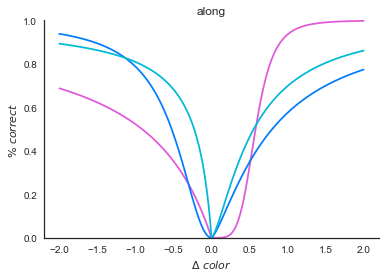

In [301]:
ax = plt.gca()
ax.set_ylim(-10,100)
#ax.set_xlim(-1,1)
ax.set_ylabel(r'$\%\ correct$')
ax.set_xlabel(r'$\Delta\ color$')
ax.set_title('along')
cleanAxes(ax,bottomLabels=True,leftLabels=True)
ax.legend()

a = p5#np.mean(p30,axis=0)
fit_ON = fit_hyperbolicratio(deltas[16:],a[16:],0,np.max(a[16:]),deltas[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])) / 2.)[0][0]],3,
                             fix_zero=True)
ax.plot(fit_ON[5][0],fit_ON[5][1]/fit_ON[1],color=sns.color_palette()[3]);
x=deltas[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],0,np.max(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])) / 2.)[0][0]],3,
                              fix_zero=True)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1]/fit_OFF[1],color=sns.color_palette()[3]);
#plt.plot(deltas,a)

a = p3#np.mean(p30,axis=0)
fit_ON = fit_hyperbolicratio(deltas[16:],a[16:],0,np.max(a[16:]),deltas[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])) / 2.)[0][0]],3,
                             fix_zero=True)
ax.plot(fit_ON[5][0],fit_ON[5][1]/fit_ON[1],color=sns.color_palette()[2]);
x=deltas[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],0,np.max(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])) / 2.)[0][0]],3,
                              fix_zero=True)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1]/fit_OFF[1],color=sns.color_palette()[2]);
#plt.plot(deltas,a)


a = p1#np.mean(p10,axis=0)
fit_ON = fit_hyperbolicratio(deltas[16:],a[16:],0,np.max(a[16:]),deltas[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])) / 2.)[0][0]],3,
                             fix_zero=True)
ax.plot(fit_ON[5][0],fit_ON[5][1]/fit_ON[1],color=sns.color_palette()[1]);
x=deltas[:17][::-1]*-1
fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],0,np.max(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])) / 2.)[0][0]],3,
                              fix_zero=True)
ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1]/fit_OFF[1],color=sns.color_palette()[1]);
#plt.plot(deltas,a)

# a = n1#np.mean(n10,axis=0)
# fit_ON = fit_hyperbolicratio(deltas[16:],a[16:],0,np.max(a[16:]),deltas[16:][np.where(np.array(a[16:]) > (np.max(a[16:]) - np.min(a[16:])) / 2.)[0][0]],3,
#                              fix_zero=True)
# ax.plot(fit_ON[5][0],fit_ON[5][1]/80.,color=sns.color_palette()[0]);
# x=deltas[:17][::-1]*-1
# fit_OFF = fit_hyperbolicratio(x,a[:17][::-1],0,np.max(a[:17][::-1]),x[np.where(np.array(a[:16][::-1]) > (np.max(a[:16][::-1]) - np.min(a[16:])) / 2.)[0][0]],3,
#                               fix_zero=True)
# ax.plot(fit_OFF[5][0]*-1,fit_OFF[5][1]/80.,color=sns.color_palette()[0]);
# ax.legend()

ax.set_ylim(0,1)

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# predict ratios in visuotopic coordinates from 
    1. Baden et al + eyetracking 
    2. Rhim et al
    3. Aihara et al
    


In [133]:
eles = np.array([-10,10,30])
behavior = np.array([3.4,3.6,2.25])
rhim_f4 = np.array([2.3,0.81,0.81])
aihara_f3 = np.array([(1.05/.74),.71/1.09,0.6/1.2])
baden_3d = np.array([2.3,1.0,0.44])
baden_4d = np.array([1.0,0.05,.05])

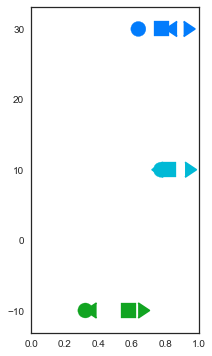

In [145]:
plt.figure(figsize=(3,6))
plt.scatter((behavior - rhim_f4)/behavior, eles, c=sns.color_palette()[:3], s= 15**2)
plt.scatter((behavior - aihara_f3)/behavior, eles, c=sns.color_palette()[:3], s= 15**2,marker='s')
plt.scatter((behavior - baden_3d)/behavior, eles, c=sns.color_palette()[:3], s= 15**2,marker=4)
plt.scatter((behavior - baden_4d)/behavior, eles, c=sns.color_palette()[:3], s= 15**2,marker=5)
plt.xlim(0,1)
plt.gcf().savefig('/Volumes/DATA2/behavior/figures/proportion_middle.eps',format='eps')

<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
<br></br>
# plot various spectra

In [3]:
from scipy.io import loadmat

In [4]:
overhead_light = loadmat('/Volumes/DATA2/behavior/spectra/hallway.mat')
overhead_dark  = loadmat('/Volumes/DATA2/behavior/spectra/overhead_red.mat')

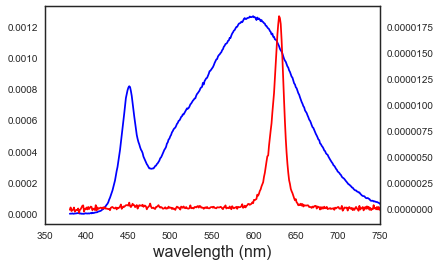

In [132]:
f,ax = plt.subplots(1,1)
ax.plot(overhead_light['Lambda'][0],overhead_light['Radiance'][0],'b')
ax.twinx().plot(overhead_dark['Lambda'][0],overhead_dark['Radiance'][0],'r')
ax.set_xlim(350,750)
ax.set_xlabel('wavelength (nm)',size=16)
plt.gcf().savefig('/Volumes/DATA2/behavior/figures/spectra_facility.eps',format='eps')

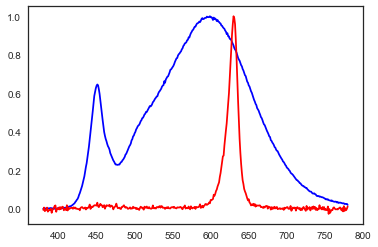

In [14]:
plt.plot(overhead_light['Lambda'][0],overhead_light['Radiance'][0]/np.max(overhead_light['Radiance'][0]),'b')
plt.plot(overhead_dark['Lambda'][0],overhead_dark['Radiance'][0]/np.max(overhead_dark['Radiance'][0]),'r')

In [76]:
equal={}
adjusted = {}
for k in ['n10','p10','p30','p50']:
    equal[k] = loadmat('/Volumes/DATA2/behavior/spectra/equal_'+k+'.mat')
    adjusted[k] = loadmat('/Volumes/DATA2/behavior/spectra/adj_'+k+'.mat')


In [102]:
sns.set_style('white')

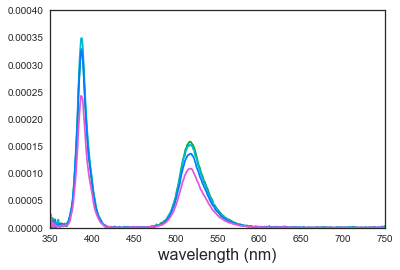

In [105]:
f,ax = plt.subplots(1,1)
for k in ['n10','p10','p30','p50']:
    ax.plot(equal[k]['Lambda'][0],equal[k]['Radiance'][0])
plt.xlim(350,750)
plt.ylim(0.,.0004)
ax.set_xlabel('wavelength (nm)',size=16)
plt.gcf().savefig('/Volumes/DATA2/behavior/figures/spectra_equal.eps',format='eps')

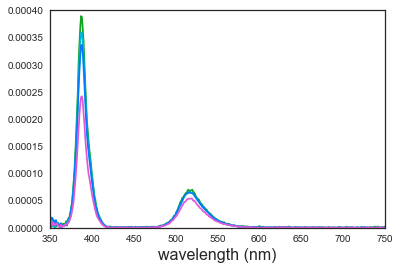

In [106]:
f,ax = plt.subplots(1,1)
for k in ['n10','p10','p30','p50']:
    ax.plot(adjusted[k]['Lambda'][0],adjusted[k]['Radiance'][0])
plt.xlim(350,750)
plt.ylim(0.,.0004)

ax.set_xlabel('wavelength (nm)',size=16)
plt.gcf().savefig('/Volumes/DATA2/behavior/figures/spectra_adjusted.eps',format='eps')